<a href="https://colab.research.google.com/github/RuthStowers/MAT421/blob/main/Module_F_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module F Homework**

*20.1, 20.2, 20.3, 20.4*

**20.1 Numerical Differentiation Problem Statement**

A **numerical grid** is an evenly spaced set of points over the domain of a function. The **spacing** of a numerical grid is the distamce between asjacent points on the grid. 

In python we can use the *linspace* function to generate a numerical grid.

*Example 1*

Generate a numerical grid using the linspace function.

In [5]:
import numpy as np

A = np.linspace(-2, 2, 21)
print(type(A))
print(A)

<class 'numpy.ndarray'>
[-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6
  0.8  1.   1.2  1.4  1.6  1.8  2. ]


Here we see a numerical grin from -2 to 2 with the step size of 0.02.

A function f(x) can be represented over an interval by computing its value on a grid. Although the function itself may be continuous, this discrete or discretized representation is useful for numerical calculations.

**20.2 Finite Difference Approximating Derivatives**

The derivative f'(x) of a fuction f(x) at the point x=a is defined as:

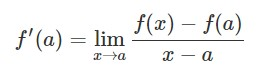

The derivative at x=a is the slope at this point. In **finite difference** approximations of this slope, we can use values of the function in the neighborhood of the point x=a to achieve the goal.

Below is an example of using forward difference to approximate the derivative of the function f(x)=sin(x).

0.024998050760130106


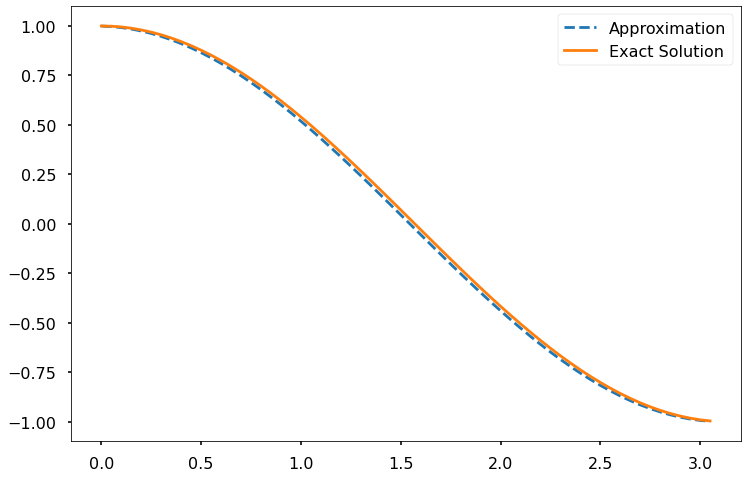

In [15]:
from io import IncrementalNewlineDecoder
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

h = 0.05
x = np.arange(0, np.pi, h)
y=np.sin(x)

forward_dif = np.diff(y)/h
x_diff = x[:-1:]
ex_sol = np.cos(x_diff)

plt.figure(figsize = (12,8))
plt.plot(x_diff, forward_dif, '--', 
         label='Approximation')
plt.plot(x_diff, ex_sol, 
         label = 'Exact Solution')
plt.legend()
plt.show

m_error = max(abs(ex_sol-forward_dif))
print(m_error)

**20.3 Approximating of Higher Order Derivatives**

We can approximate higher order derviatives using the Taylor series. 

Here is an example of using the Taylor series to approximate the nth order derivatives of the function f(x)=sin(x).

<function matplotlib.pyplot.show(close=None, block=None)>

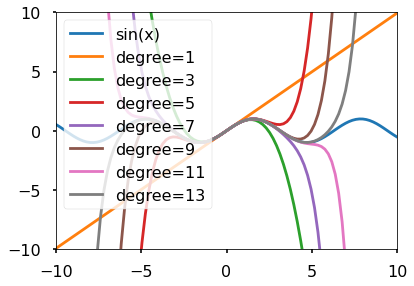

In [24]:
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10,10, num=100)
plt.plot(x, np.sin(x), label ="sin(x)")

for degree in np.arange(1,15, step=2):
  taylor_sin = approximate_taylor_polynomial(np.sin, 0, degree, 1, order = degree +2)
  plt.plot(x, taylor_sin(x), label =f"degree={degree }")

plt.legend( )
plt.tight_layout()
plt.axis([-10,10,-10,10])
plt.show

**20.4 Numerical Differentiation with Noise**

Sometimes data can be contaminated with **noise**, meaning its value is off by a small amount from what it would be if it were computed from a pure mathematical function. 

To illustrate this point, we numerically compute the derivative of a simple sine wave corrupted by a small cosin wave. Consider the following two functions:

f(x)=sin(x)
and
fϵ,ω(x)=sin(x)+ϵcos(ωx)

where 0<ϵ≪1 is a very small number and ω is a large number. When ϵ is small, it is clear that f≃fϵ,ω. To illustrate this point, we plot fϵ,ω(x) for ϵ=0.01 and ω=100, and we can see it is very close to f(x), as shown in the following figure.

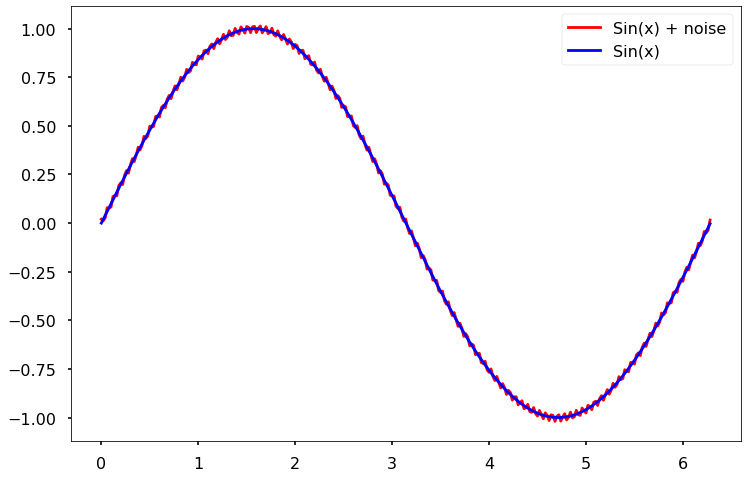

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline 

x = np.arange(0, 2*np.pi, 0.02)
omeg = 100
ep = .02

y = np.sin(x)
y_noi = y + ep*np.cos(omeg*x)

plt.figure(figsize = (12,8))
plt.plot(x, y_noi, 'r-', label = "Sin(x) + noise")
plt.plot(x, y  , 'b-' , label="Sin(x)")
plt.legend()
plt.show()

Since ϵω may not be small when ω is large, the contribution of the noise to the derivative may not be small. As a result, the derivative (analytic and numerical) may not be usable as shown below.

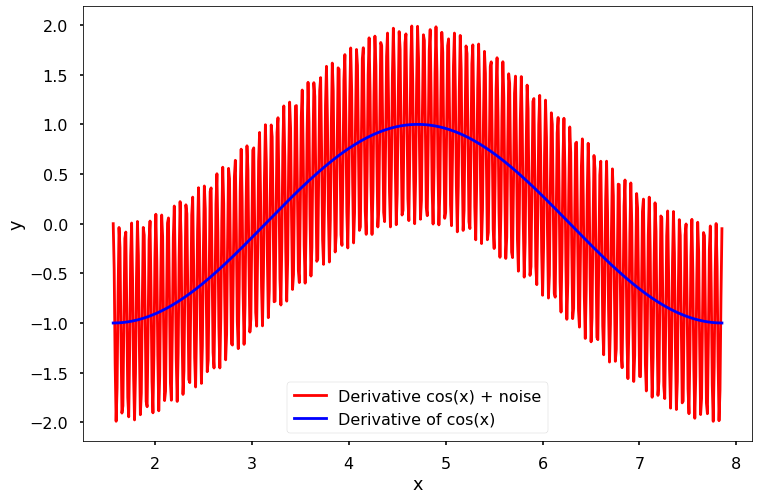

In [48]:
x = np.arange(np.pi/2, 5*np.pi/2, 0.01) 
# compute function
y = -np.sin(x) 
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()